In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [2]:
pain = pd.read_csv("backpain.csv")

<IPython.core.display.Javascript object>

In [3]:
pain.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


<IPython.core.display.Javascript object>

In [4]:
pain.shape

(310, 13)

<IPython.core.display.Javascript object>

In [5]:
pain[pain.duplicated()].count()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
pain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


<IPython.core.display.Javascript object>

In [7]:
pain.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
pain.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


<IPython.core.display.Javascript object>

In [9]:
pain["Status"].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [11]:
pain.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


<IPython.core.display.Javascript object>

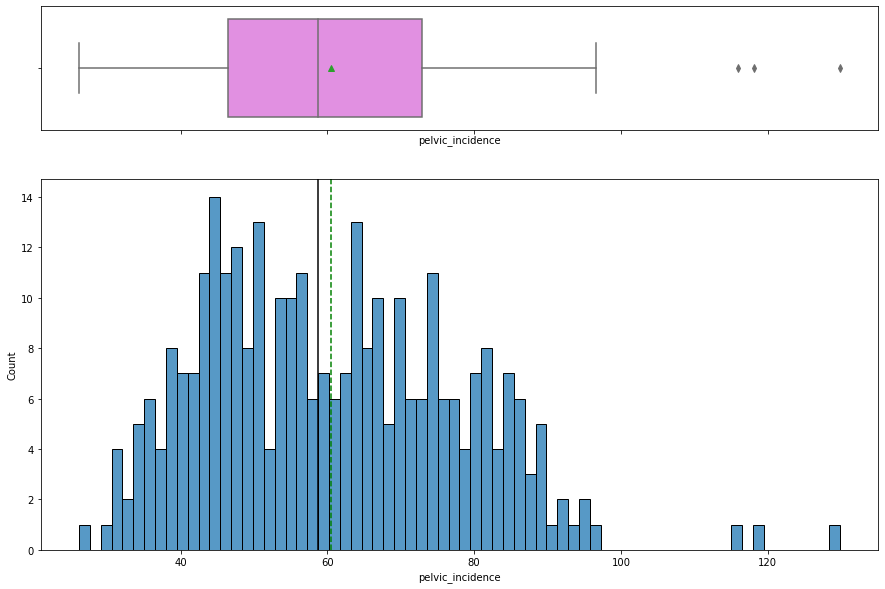

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(pain, "pelvic_incidence", bins=70)

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

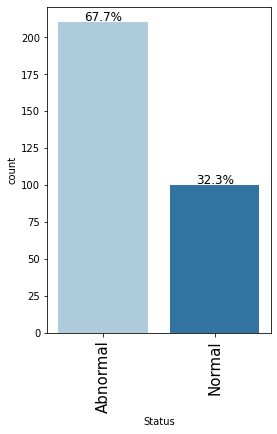

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(pain, "Status", perc=True)

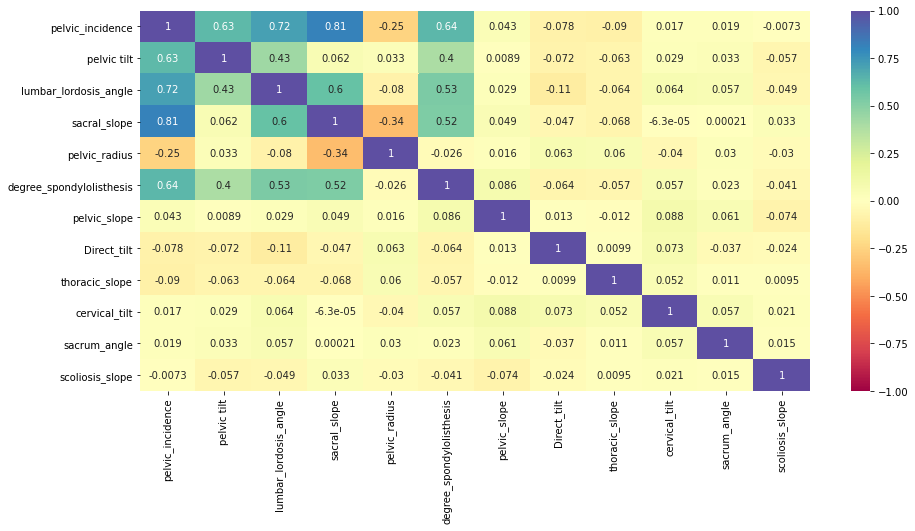

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(pain.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

In [16]:
# creating dummy varibles
dummy_data = pd.get_dummies(pain, columns=["Status"], drop_first=False,)

<IPython.core.display.Javascript object>

In [17]:
dummy_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status_Abnormal,Status_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1,0


<IPython.core.display.Javascript object>

In [18]:
dummy_data = dummy_data.drop("Status_Normal", axis=1)
dummy_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


<IPython.core.display.Javascript object>

In [19]:
X = dummy_data.drop("Status_Abnormal", axis=1)  # Features
y = dummy_data["Status_Abnormal"].astype("int")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

In [20]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(217, 12) (93, 12)


<IPython.core.display.Javascript object>

In [21]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 217
Number of rows in test data = 93


<IPython.core.display.Javascript object>

In [22]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.663594
0    0.336406
Name: Status_Abnormal, dtype: float64
Percentage of classes in test set:
1    0.709677
0    0.290323
Name: Status_Abnormal, dtype: float64


<IPython.core.display.Javascript object>

In [23]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [24]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [25]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

## Training Set

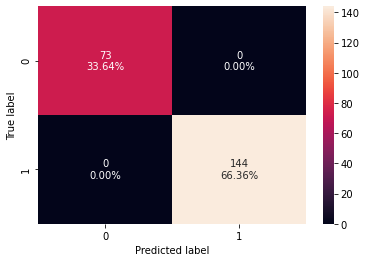

<IPython.core.display.Javascript object>

In [27]:
confusion_matrix_sklearn(model, X_train, y_train)

In [28]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

## Test Set

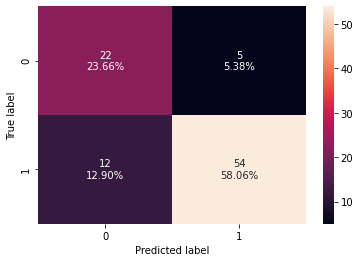

<IPython.core.display.Javascript object>

In [29]:
confusion_matrix_sklearn(model, X_test, y_test)

In [30]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8181818181818182


<IPython.core.display.Javascript object>

In [31]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
sacral_slope              2.324055e-01
degree_spondylolisthesis  2.091532e-01
pelvic_radius             1.145105e-01
cervical_tilt             1.062376e-01
pelvic_incidence          9.167880e-02
Direct_tilt               8.352664e-02
sacrum_angle              8.113258e-02
pelvic tilt               5.266842e-02
scoliosis_slope           2.677028e-02
lumbar_lordosis_angle     1.916515e-03
thoracic_slope            2.816747e-17
pelvic_slope              0.000000e+00


<IPython.core.display.Javascript object>

In [32]:
from sklearn.linear_model import LogisticRegression

<IPython.core.display.Javascript object>

In [33]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [34]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Intercept
Coefficients,-0.002841,0.093938,-0.016776,-0.09678,-0.15388,0.150834,-0.117469,0.012085,-0.080467,-0.026181,0.012152,0.008312,21.75032


<IPython.core.display.Javascript object>

In [35]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

## Scoring

In [36]:
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.7741935483870968


<IPython.core.display.Javascript object>

In [37]:
# Checking number of positives
y.sum(axis=0)

210

<IPython.core.display.Javascript object>

In [38]:
feature_names = list(X.columns)
print(feature_names)

['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


<IPython.core.display.Javascript object>

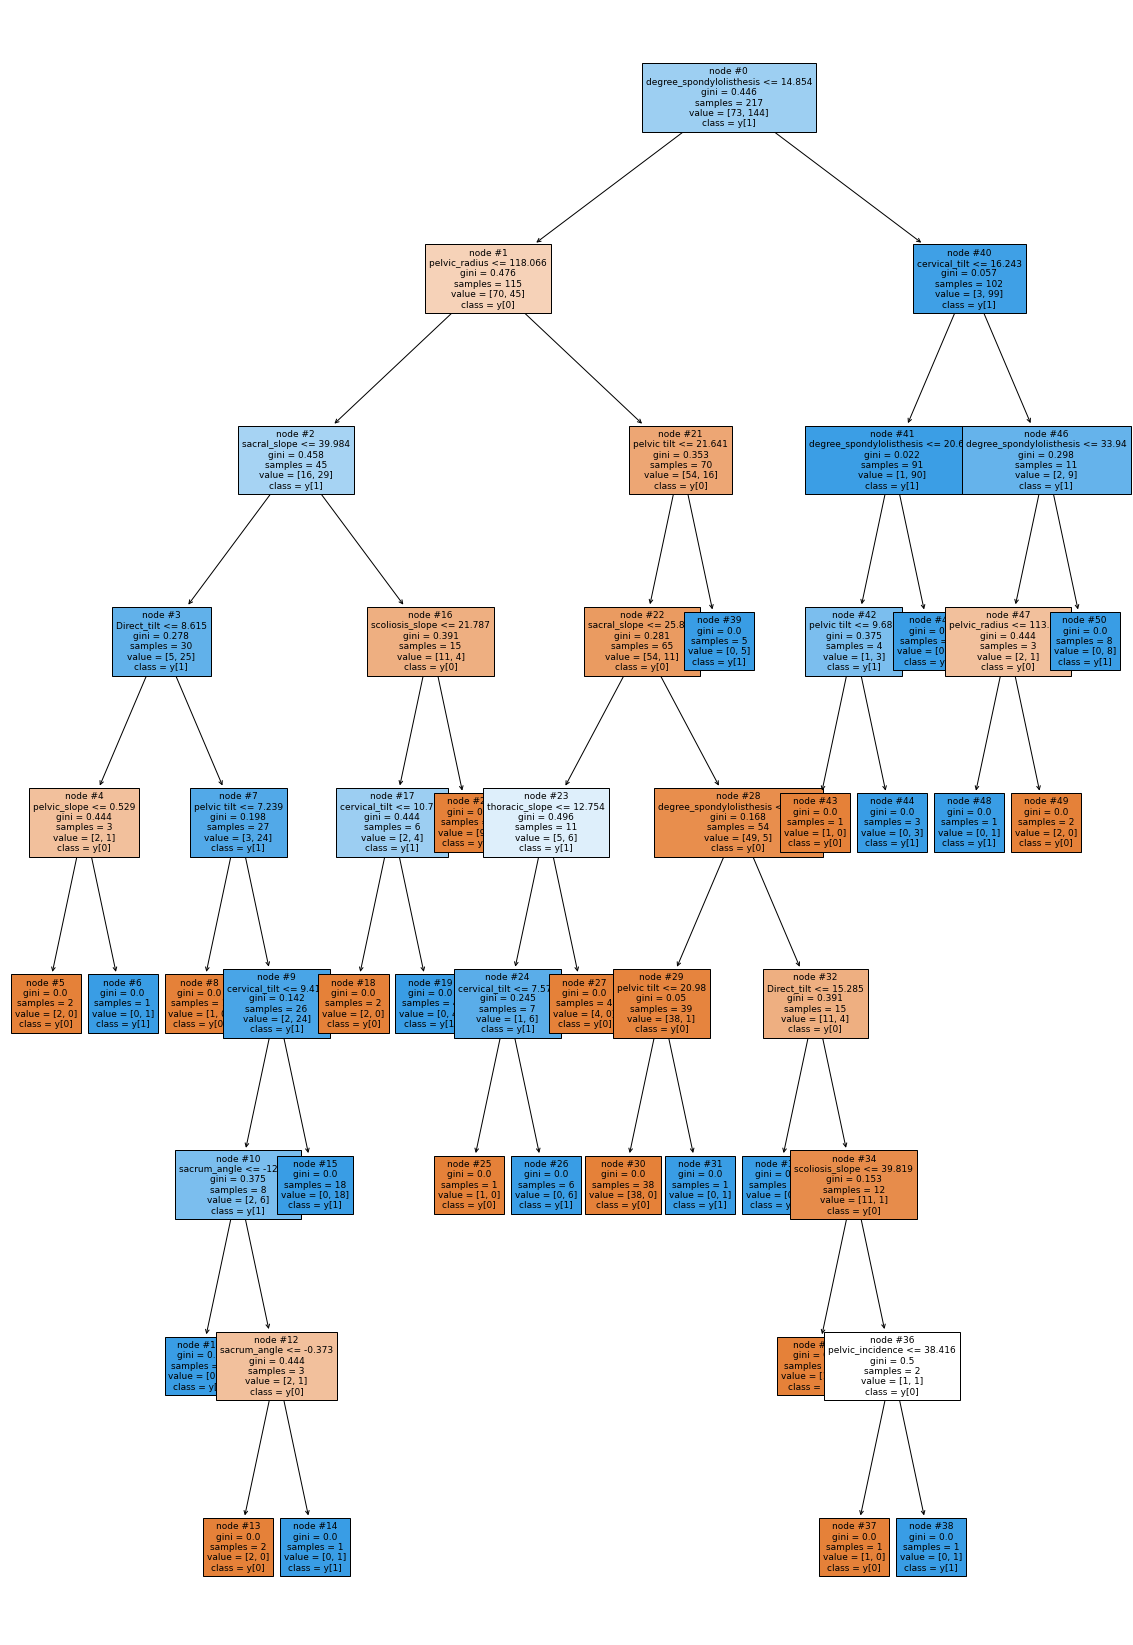

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

### Tree Default

In [40]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Tree 1

In [41]:
dTree1 = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

<IPython.core.display.Javascript object>

### Tree 2

In [42]:
dTree2 = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=1)
dTree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

<IPython.core.display.Javascript object>

### Tree 3

In [43]:
dTree3 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
dTree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<IPython.core.display.Javascript object>

### Tree 4 

In [44]:
dTree4 = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
dTree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

<IPython.core.display.Javascript object>

### Tree 5

In [45]:
dTree5 = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=1)
dTree5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

<IPython.core.display.Javascript object>

### Tree 6

In [46]:
dTree6 = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=1)
dTree6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

<IPython.core.display.Javascript object>

### Tree 7

In [47]:
dTree7 = DecisionTreeClassifier(criterion="gini", max_depth=7, random_state=1)
dTree7.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

<IPython.core.display.Javascript object>

### Tree 8

In [48]:
dTree8 = DecisionTreeClassifier(criterion="gini", max_depth=8, random_state=1)
dTree8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

<IPython.core.display.Javascript object>

In [49]:
print("Set: Default  - 8 Layers Deep")
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))
print("--------------------")
print("Set: 1")
print("Accuracy on training set : ", dTree1.score(X_train, y_train))
print("Accuracy on test set : ", dTree1.score(X_test, y_test))
print("--------------------")
print("Set: 2")
print("Accuracy on training set : ", dTree2.score(X_train, y_train))
print("Accuracy on test set : ", dTree2.score(X_test, y_test))
print("--------------------")
print("Set: 3")
print("Accuracy on training set : ", dTree3.score(X_train, y_train))
print("Accuracy on test set : ", dTree3.score(X_test, y_test))
print("--------------------")
print("Set: 4")
print("Accuracy on training set : ", dTree4.score(X_train, y_train))
print("Accuracy on test set : ", dTree4.score(X_test, y_test))
print("--------------------")
print("Set: 5")
print("Accuracy on training set : ", dTree5.score(X_train, y_train))
print("Accuracy on test set : ", dTree5.score(X_test, y_test))
print("--------------------")
print("Set: 6")
print("Accuracy on training set : ", dTree6.score(X_train, y_train))
print("Accuracy on test set : ", dTree6.score(X_test, y_test))
print("--------------------")
print("Set: 7")
print("Accuracy on training set : ", dTree7.score(X_train, y_train))
print("Accuracy on test set : ", dTree7.score(X_test, y_test))
print("--------------------")
print("Set: 8")
print("Accuracy on training set : ", dTree8.score(X_train, y_train))
print("Accuracy on test set : ", dTree8.score(X_test, y_test))
print("--------------------")

Set: Default  - 8 Layers Deep
Accuracy on training set :  1.0
Accuracy on test set :  0.7741935483870968
--------------------
Set: 1
Accuracy on training set :  0.7788018433179723
Accuracy on test set :  0.7956989247311828
--------------------
Set: 2
Accuracy on training set :  0.8387096774193549
Accuracy on test set :  0.8279569892473119
--------------------
Set: 3
Accuracy on training set :  0.8986175115207373
Accuracy on test set :  0.7634408602150538
--------------------
Set: 4
Accuracy on training set :  0.9262672811059908
Accuracy on test set :  0.8064516129032258
--------------------
Set: 5
Accuracy on training set :  0.9631336405529954
Accuracy on test set :  0.7741935483870968
--------------------
Set: 6
Accuracy on training set :  0.9861751152073732
Accuracy on test set :  0.7849462365591398
--------------------
Set: 7
Accuracy on training set :  0.9907834101382489
Accuracy on test set :  0.8064516129032258
--------------------
Set: 8
Accuracy on training set :  1.0
Accuracy 

<IPython.core.display.Javascript object>

In [50]:
from sklearn.linear_model import LogisticRegression

<IPython.core.display.Javascript object>

In [51]:
print(
    pd.DataFrame(
        dTree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                          Imp
degree_spondylolisthesis  1.0
pelvic_incidence          0.0
pelvic tilt               0.0
lumbar_lordosis_angle     0.0
sacral_slope              0.0
pelvic_radius             0.0
pelvic_slope              0.0
Direct_tilt               0.0
thoracic_slope            0.0
cervical_tilt             0.0
sacrum_angle              0.0
scoliosis_slope           0.0


<IPython.core.display.Javascript object>

In [52]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

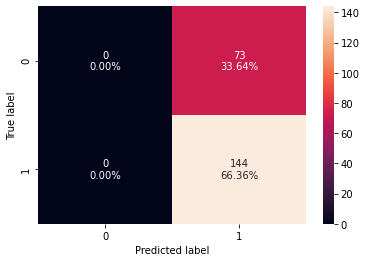

<IPython.core.display.Javascript object>

In [53]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [54]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

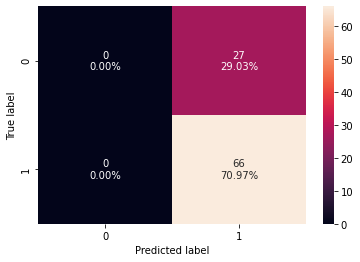

<IPython.core.display.Javascript object>

In [55]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [56]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 1.0


<IPython.core.display.Javascript object>